<a href="https://colab.research.google.com/github/mt508/machine-learning-/blob/main/studentperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
from zlib import crc32
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as scn
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [44]:


data_student = pd.read_csv('/content/sample_data/Student_Performance.csv')


In [45]:
data_student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [46]:
data_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


observations are


1.   no missing value
2.   string object is 1 extracurricular Activities



array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

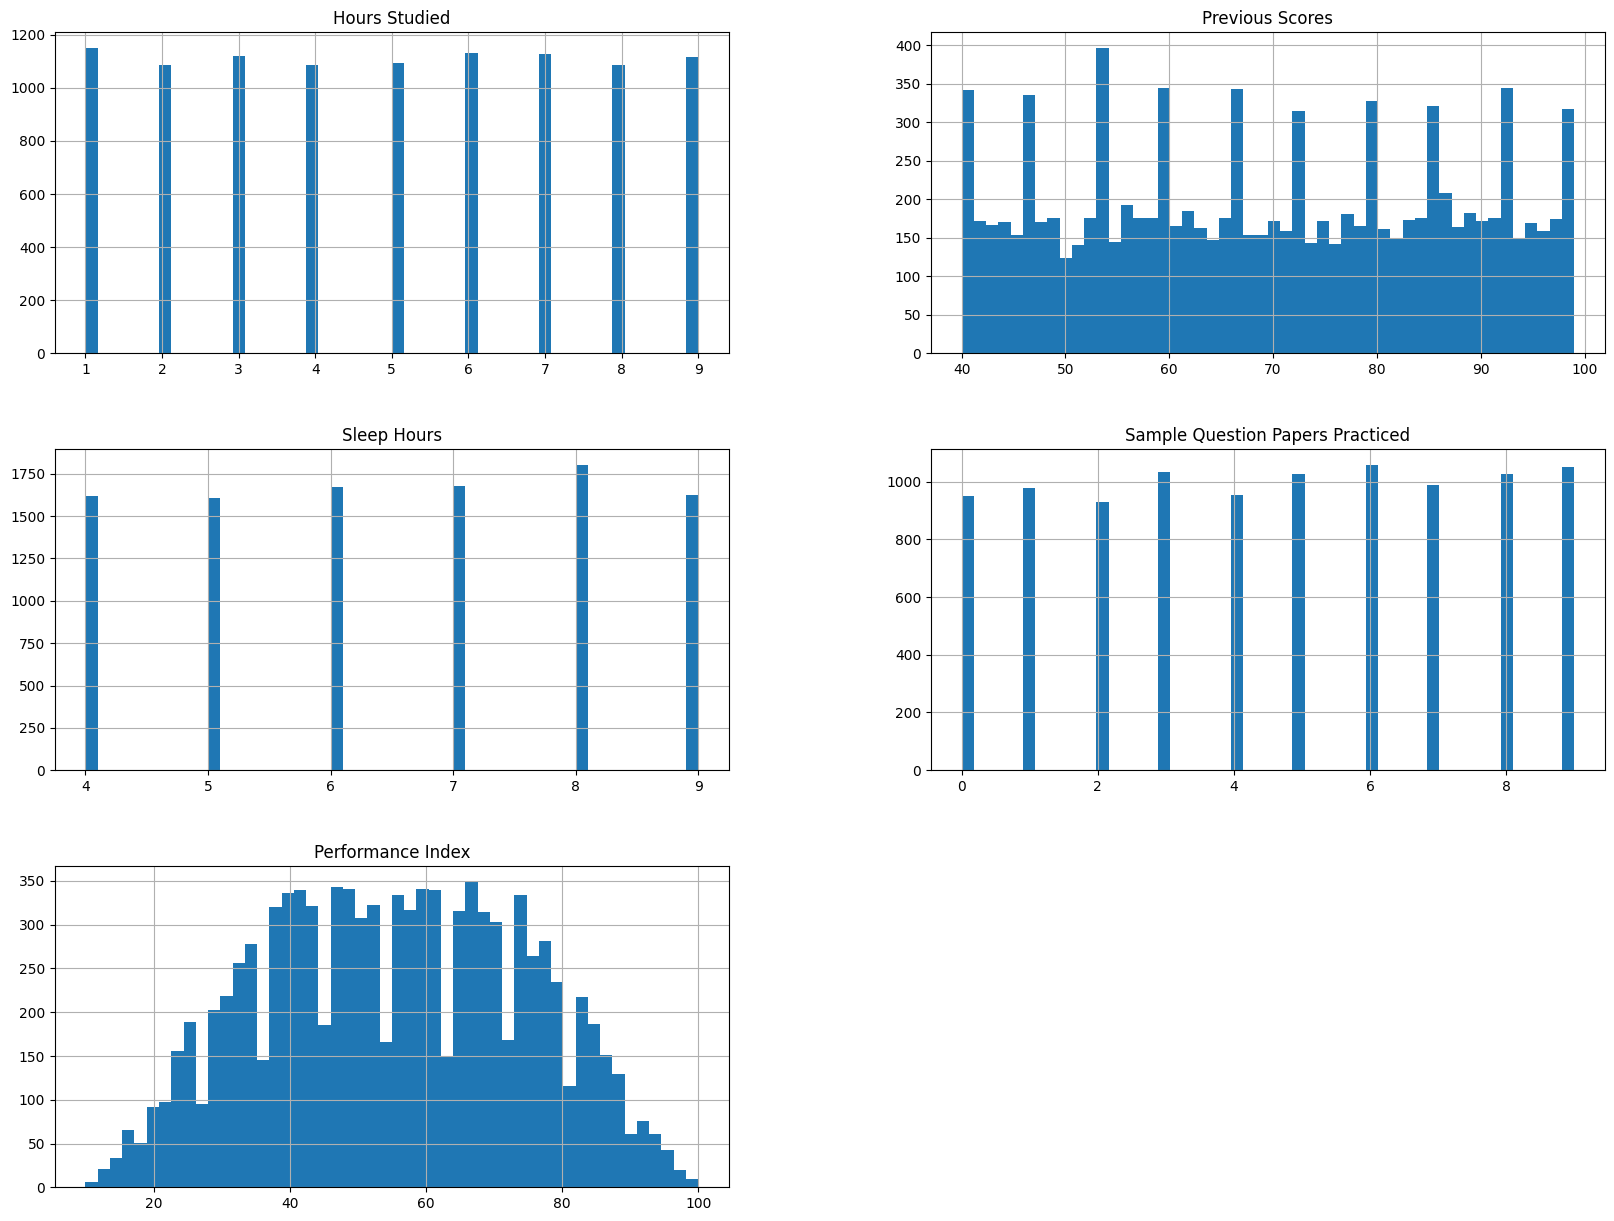

In [47]:
data_student.hist(bins=50, figsize=(20,15))

In [48]:
def is_id_in_test_set(identifier,testratio):
  return crc32(np.int64(identifier))<=testratio*2**32

In [49]:
def split_data(data, id_column,testratio):
  id=data[id_column]
  is_test_set=id.apply(lambda id_:is_id_in_test_set(id_,0.2))
  train_set=data.loc[~is_test_set]
  test_set=data.loc[is_test_set]
  return train_set,test_set

In [50]:
data_with_id=data_student.copy()
data_with_id["id"]=data_with_id.index

In [51]:
train_set,test_set=split_data(data_with_id,"id",0.2)

In [52]:
data_with_id['perf_cat']=pd.cut(data_with_id['Performance Index'],bins=[0, 50, 75, 90, 100],
    labels=[1, 2, 3, 4] )

<Axes: xlabel='perf_cat'>

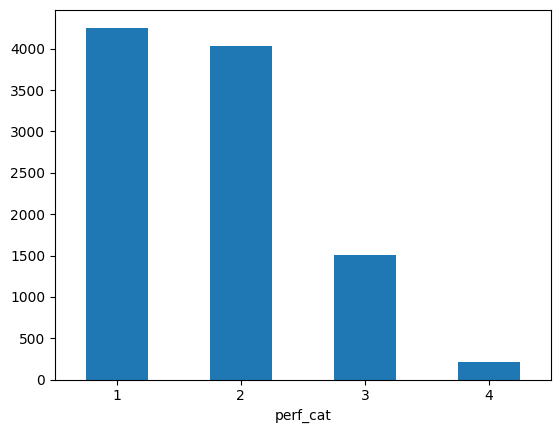

In [53]:
data_with_id['perf_cat'].value_counts().sort_index().plot.bar(rot=0)

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit
start_split=[]
Stratifier= StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
for train_index,test_index in Stratifier.split(data_with_id,data_with_id['perf_cat']):
  strat_train_set = data_with_id.iloc[train_index].drop('perf_cat', axis=1)
  strat_test_set = data_with_id.iloc[test_index].drop('perf_cat', axis=1)
  start_split.append((strat_train_set,strat_test_set))


In [55]:
train_set_strat=start_split[0]
test_set_strat=start_split[0]

In [56]:
students=train_set.copy()

In [57]:

corr_matrix = students.select_dtypes(include=['int', 'float']).corr()


In [58]:
corr_matrix['Performance Index'].sort_values(ascending=False)

,Performance Index
Performance Index,1.000000
Previous Scores,0.915552
Hours Studied,0.372066
Sleep Hours,0.052444
Sample Question Papers Practiced,0.046048
id,0.005324


array([[<Axes: xlabel='Previous Scores', ylabel='Previous Scores'>,
        <Axes: xlabel='Performance Index', ylabel='Previous Scores'>,
        <Axes: xlabel='Hours Studied', ylabel='Previous Scores'>],
       [<Axes: xlabel='Previous Scores', ylabel='Performance Index'>,
        <Axes: xlabel='Performance Index', ylabel='Performance Index'>,
        <Axes: xlabel='Hours Studied', ylabel='Performance Index'>],
       [<Axes: xlabel='Previous Scores', ylabel='Hours Studied'>,
        <Axes: xlabel='Performance Index', ylabel='Hours Studied'>,
        <Axes: xlabel='Hours Studied', ylabel='Hours Studied'>]],
      dtype=object)

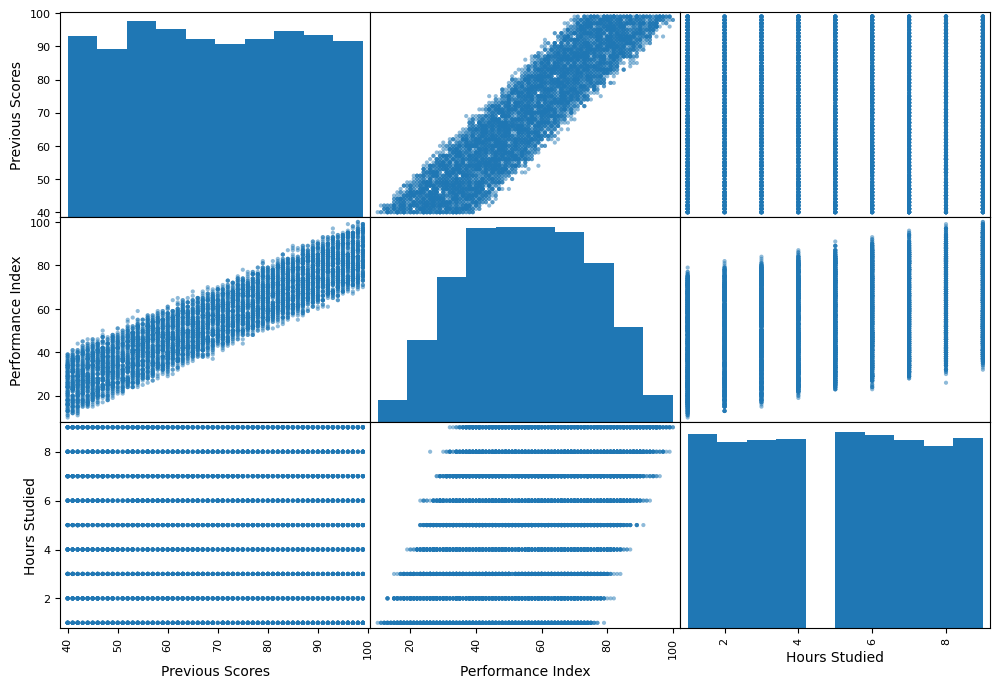

In [59]:
attribute = ['Previous Scores','Performance Index','Hours Studied']
scatter_matrix(students[attribute],figsize=(12,8))

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

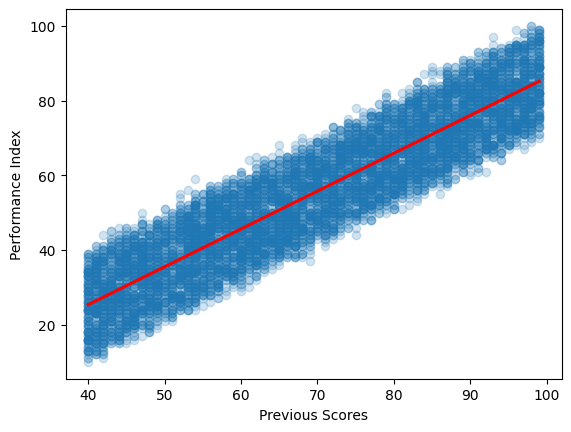

In [60]:
scn.regplot(x='Previous Scores',y='Performance Index',data=students,line_kws={'color':'red'},scatter_kws={'alpha':0.2})

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

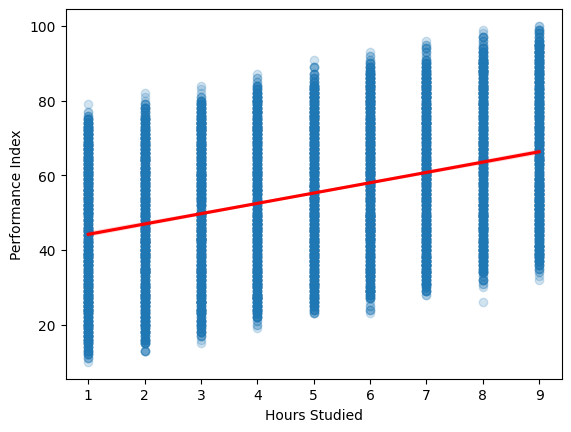

In [61]:
scn.regplot(x='Hours Studied',y='Performance Index',data=students,line_kws={'color':'red'},scatter_kws={'alpha':0.2})

In [62]:
'''def one_hot_encoding(data):
    data_column = data.select_dtypes(include=['object']).columns
    if len(data_column) == 0:
        return data
    else:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_data = encoder.fit_transform(data[data_column])
        encode_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data_column), index=data.index)
        data = data.drop(columns=data_column)
        return pd.concat([data, encode_df], axis=1)'''




"def one_hot_encoding(data):\n    data_column = data.select_dtypes(include=['object']).columns\n    if len(data_column) == 0:\n        return data\n    else:\n        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')\n        encoded_data = encoder.fit_transform(data[data_column])\n        encode_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data_column), index=data.index)\n        data = data.drop(columns=data_column)\n        return pd.concat([data, encode_df], axis=1)"

In [63]:
'''one_hot_encoding(students)'''

'one_hot_encoding(students)'

In [100]:
def ratio(X):
  X=X.to_numpy()
  return X[:,[0]]/X[:,[1]]
def ratio_name(transformer,feature_name_in):
  return f"{feature_name_in[0]}_per_{feature_name_in[1]}"


In [104]:
def ratio_pipeline():
    return   make_pipeline(
        FunctionTransformer(ratio,feature_names_out=ratio_name),
        StandardScaler()
  )

In [103]:
from scipy.stats import skew

for col in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    print(col, "Skewness:", students[col].skew())

Hours Studied Skewness: 0.004142456849320498
Previous Scores Skewness: 0.00615633727171147
Sleep Hours Skewness: -0.0461486714468904
Sample Question Papers Practiced Skewness: -0.04055028746266963


In [102]:
def cat_encoding():
   return  OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [101]:
num_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
cat_features = ['Extracurricular Activities']

preprocessing=ColumnTransformer(
    transformers=[
        ('ratio1',ratio_pipeline(),['Hours Studied','Previous Scores']),
        ('ratio2',ratio_pipeline(),['Sample Question Papers Practiced','Hours Studied']),
        ('ratio3',ratio_pipeline(),['Sample Question Papers Practiced','Previous Scores']),
        ('cat',cat_encoding(),cat_features)
    ],remainder= 'passthrough'

 )

In [92]:
print(preprocessing.get_feature_names_out)

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('ratio',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7e0351737560>,
                                                                      func=<function ratio at 0x7e0351737600>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Hours Studied', 'Previous Scores']),
                                ('ratio',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTra...
                                                  StandardScaler())]),
                                 ['Sample Question Papers Practiced',
           

In [105]:
lin_reg=make_pipeline(preprocessing,LinearRegression())
label=students['Performance Index']
data=students.drop('Performance Index',axis=1)
lin_reg.fit(data,label)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ratio1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e0351583c40>,
                                                                                       func=<function ratio at 0x7e0351582c00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Hours Studied',
                                                   'Previous Scores']),
                                                 ('ratio2',
                                                  Pipeline(st...
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e0351583c40>,
                                                                                       func=<function ratio at 0x7e0351582c00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Sample Question Papers '
                                                   'Practiced',
                                                   'Previous Scores']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('linearregression', LinearRegression())])